In [1]:
import os
import pandas as pd

HOUSING_PATH = "/Users/tuncer/Documents/Machine Learning/Datasets"


def load_housing_data(housing_path = HOUSING_PATH):  # The function that reads data
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [2]:
housing = load_housing_data()
#housing.head()

In [3]:
#housing.info()

In [4]:
#housing["ocean_proximity"].value_counts()

In [5]:
#housing.describe()

In [6]:
import numpy as np

# Splits dataset into two pieces trainSet and testSet
# Default test ratio is %20
# Function returns two pandas dataframe trainSet and testSet respectively
def split_train_set(data, test_ratio = 0.2):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:train_test_size]
    train_indices = shuffled_indices[train_test_size:]
    return data.iloc[trains_indices], data.iloc[test_indices]

# Problems : Different test set in every run, Breaks if dataSet is updated
# Possible Solutions : Seeds(again breaks if dataset is updated), using unique identifiers(hashing)

In [7]:
import hashlib

# Compute hash of each instance's identifier
# Keep only last byte of the hash
# Put the instance in the testSet if this value is lower than 51(256*0.2 = 51)
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash = hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : test_set_check(id_, test_ratio, hash))
    in_test_set.head()
    return data.loc[~in_test_set], data.loc[in_test_set]

In [8]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

In [9]:
from sklearn.model_selection import train_test_split

# Scikit-learn's function to split data sets
# Basically same with the function above
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

# Problem : Uses random, but we want stratified sampling

In [10]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [11]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 20046 to 3665
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      3921 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


In [12]:
# Creating an income_category attribute
# Divide median_income by 1.5 (limit the number of categories)
# Use ceil to have discrete categories
housing["income_category"] = np.ceil(housing["median_income"] / 1.5)
# If category is greater than 5 make it 5
housing["income_category"].where(housing["income_category"] < 5, 5.0, inplace = True)

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_category"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
#strat_test_set.head()

In [15]:
# Need to remove income_category attribute

for set in (strat_train_set, strat_test_set):
    set.drop(["income_category"], axis = 1, inplace = True)

In [16]:
housing = strat_train_set.copy()

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

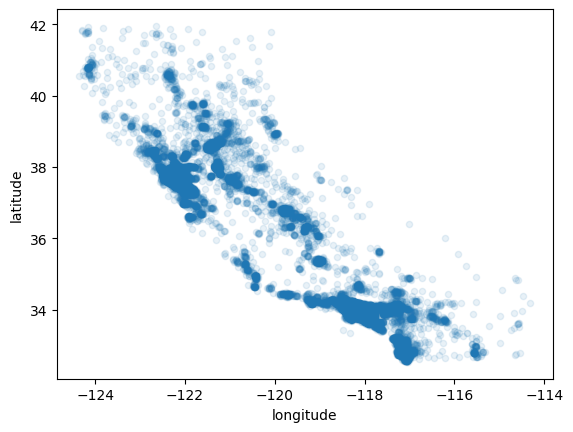

In [17]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

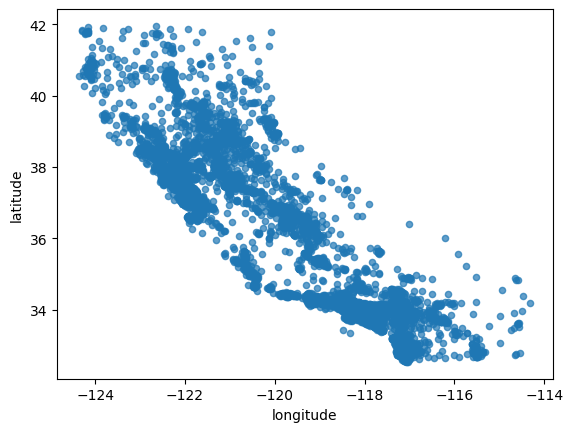

In [18]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.7)

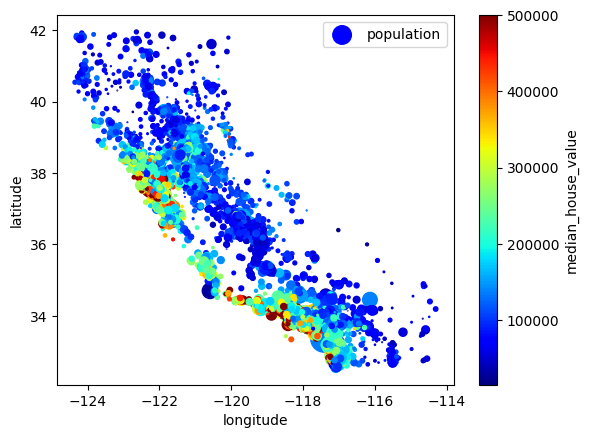

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 1,
            s = housing["population"] / 100, label = "population",
            c = "median_house_value", cmap = "jet", colorbar = True
            )
plt.show()

In [20]:
corr_matrix = housing.corr()

/var/folders/8b/x_vzp85s5gsbjvzgqplfp9780000gn/T/ipykernel_38022/2466220658.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [21]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
            "housing_median_age"]

scatter_matrix(housing[attributes], figsize = (12, 8))

array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot: xlabel

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

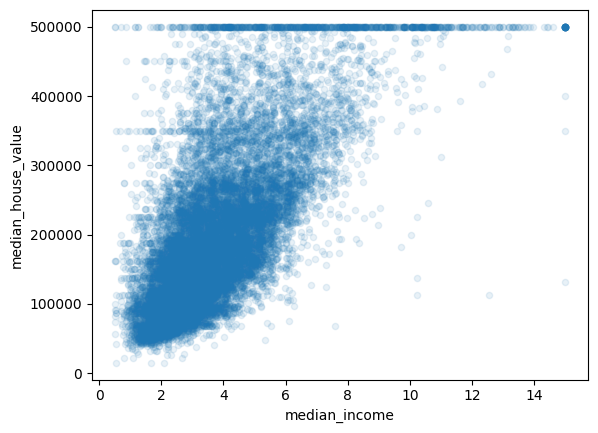

In [23]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value",
             alpha = 0.1)

In [24]:
# We can combine some attributes to gain more insight

housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [25]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

/var/folders/8b/x_vzp85s5gsbjvzgqplfp9780000gn/T/ipykernel_38022/1585776046.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [26]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

In [27]:
# Handling missing values in the data set

housing.dropna(subset = ["total_bedrooms"]) # delete corresponding districts
housing.drop("total_bedrooms", axis = 1)  # delete the whole attribute
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median)  # set the missing values to median

12655     797.0
15502     855.0
2908      310.0
14053     519.0
20496     646.0
          ...  
15174    1231.0
12661    1422.0
19263     166.0
19140     580.0
19773     222.0
Name: total_bedrooms, Length: 16512, dtype: float64

In [28]:
# Sklearn has a class for missing values

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")
housing_only_numeric = housing.drop("ocean_proximity", axis = 1) # median can be computed only for numerical values

imputer.fit(housing_only_numeric)

SimpleImputer(strategy='median')

In [29]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [30]:
X = imputer.transform(housing_only_numeric)

housing_transformed = pd.DataFrame(X, columns = housing_only_numeric.columns)

In [31]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

# Problem: Nearby values are not similar more than distant values
# Solution: One hot encoding

array([1, 4, 1, ..., 0, 0, 1])

In [32]:
housing_cat_encoded.reshape(-1, 1)

array([[1],
       [4],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [33]:
#housing["ocean_proximity"]

In [34]:
#print(encoder.classes_)

In [35]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
housing_cat_1hot = one_hot_encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot # This yields a sparse matrix

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [36]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [37]:
# Instead of converting from text categories to integer categories and then one hot vectors
# We can use LabelBinarizer

from sklearn.preprocessing import LabelBinarizer

binarizer = LabelBinarizer()
housing_cat_2hot = binarizer.fit_transform(housing_cat)
housing_cat_2hot

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do def transform(self, X, y=None):
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy = "median")),
                         ('attributes_adder', CombinedAttributesAdder()),
                         ('standart_scaler', StandardScaler()),
                        ])

housing_num_transformed = num_pipeline.fit_transform(housing_only_numeric)

In [40]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer

num_attributes = list(housing_only_numeric)
cat_attributes = ["ocean_proximity"]


full_pipeline = ColumnTransformer([("num_pipeline", num_pipeline, num_attributes),
                                                 ("cat_pipeline", OneHotEncoder(), cat_attributes),])


housing_prepared = full_pipeline.fit_transform(housing)

In [41]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [42]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [43]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:\t", lin_reg.predict(some_data_prepared))


Predictions:	 [ 86208. 304704. 153536. 185728. 244416.]


In [44]:
# compare with actual values
print("Actual values: \t", list(some_labels))

Actual values: 	 [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [45]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mean_squared_error = mean_squared_error(housing_labels, housing_predictions)
lin_root_mean_squared_error = np.sqrt(lin_mean_squared_error)
lin_root_mean_squared_error

# this rmse value tells us that the model is underfitted
# we need more powerful model

68633.40810776998

In [46]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(housing_prepared, housing_labels)

housing_predictions_tree = tree_regressor.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions_tree)
tree_rmse = np.sqrt(tree_mse)


tree_rmse

# Now we overfit the data
# We must not touch the test data until the model is ready


0.0

In [47]:
# Cross-Validation(K-fold)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_regressor, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)

rmse_scores = np.sqrt(-scores)


def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standart Deviation: ", scores.std())
    print("Deviation: ", scores.mean() - scores.std(), scores.mean() + scores.std())
    
display_scores(rmse_scores)



Scores:  [73540.19834624 67655.07660176 68556.43235148 70849.06430192
 70566.86113128 75948.98821147 69649.11432073 73743.32131086
 67319.92045752 70572.6951412 ]
Mean:  70840.16721744605
Standart Deviation:  2667.1301401255637
Deviation:  68173.03707732049 73507.29735757162


In [48]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
rmse_lin_scores = np.sqrt(-lin_scores)

display_scores(rmse_lin_scores)


Scores:  [71800.38078269 64114.99166359 67844.95431254 68635.19072082
 66801.98038821 72531.04505346 73992.85834976 68824.54092094
 66474.60750419 70143.79750458]
Mean:  69116.4347200802
Standart Deviation:  2880.6588594759014
Deviation:  66235.7758606043 71997.0935795561


In [49]:
rmse_scores.std()

2667.1301401255637

In [50]:
import time
start_time = time.time()
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(housing_prepared, housing_labels)

#housing_predictions_forest = 

forest_scores = cross_val_score(random_forest_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
rmse_forest_scores = np.sqrt(-forest_scores)


display_scores(rmse_forest_scores)
print(time.time() - start_time)


Scores:  [51632.20389177 48594.9695506  47364.55609309 51846.03030548
 47533.95641751 52396.62085869 52596.36648733 49599.3427462
 48527.55878102 53816.66260069]
Mean:  50390.82677323744
Standart Deviation:  2211.9209102020577
Deviation:  48178.90586303538 52602.74768343949
90.10279679298401


In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators' : [3, 10, 30, 100], 'max_features' : [2, 4, 6, 8]},
              {'bootstrap' : [False], 'n_estimators' : [3, 10, 30], 'max_features' : [2, 3, 4]},
             ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10, 30]}],
             scoring='neg_mean_squared_error')

In [55]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 100}

In [57]:
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(np.sqrt(-mean_score), params)

64167.48629798651 {'max_features': 2, 'n_estimators': 3}
55409.574133648726 {'max_features': 2, 'n_estimators': 10}
52854.74434770693 {'max_features': 2, 'n_estimators': 30}
51589.260028013116 {'max_features': 2, 'n_estimators': 100}
60977.08722559577 {'max_features': 4, 'n_estimators': 3}
52691.15254471713 {'max_features': 4, 'n_estimators': 10}
50603.32947531891 {'max_features': 4, 'n_estimators': 30}
49526.98803318226 {'max_features': 4, 'n_estimators': 100}
60043.983281696164 {'max_features': 6, 'n_estimators': 3}
51819.97752016207 {'max_features': 6, 'n_estimators': 10}
49981.557052591605 {'max_features': 6, 'n_estimators': 30}
49252.503700457164 {'max_features': 6, 'n_estimators': 100}
58740.08598626398 {'max_features': 8, 'n_estimators': 3}
52129.50181257664 {'max_features': 8, 'n_estimators': 10}
50422.19589263807 {'max_features': 8, 'n_estimators': 30}
49313.498708896324 {'max_features': 8, 'n_estimators': 100}
62487.699576653715 {'bootstrap': False, 'max_features': 2, 'n_esti

In [59]:
# TEST SET

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)



In [60]:
final_rmse

47246.304483215106